# Atmospheric attenuation for atmospheric transmission

In [5]:
import itur
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

In [119]:
# Make Jupyter notebook plots crisper
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# Serif text
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.autolayout'] = True
plt.rcParams["axes.grid"] = True # to overwrite simply call plt.grid(False)

In [101]:
# standard reference conditions
el = 90
rho = 7.5 * u.g / u.m**3
P = 1013 * u.hPa
T = 25 * u.deg_C
f = np.linspace(1, 12, 1000) # frequencies of 1-12 GHz

In [128]:
# attenuation in dry air, standard conditions
Att_dry = itur.gaseous_attenuation_slant_path(f, el, rho, P, T)
storm_conditions = {
    "D": 1, # reference 1m transmitting dish
    "p": 1E-3, # rain attenuation exceedance - not sure how this works?
    # I just chose the value that maximized the attenuation
    "R001": 150, # monsoon-level rainfall rate
}
# attenuation in high-humidity, worst-case 
# tropical storm conditions
# lat & long using the location of the Great Whirl gyre
# see https://en.wikipedia.org/wiki/Indian_Monsoon_Current
Att_wet = itur.atmospheric_attenuation_slant_path(10, 55, f, el, **storm_conditions)

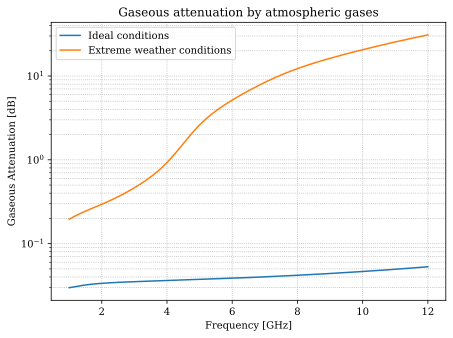

In [129]:
plt.title("Gaseous attenuation by atmospheric gases")
plt.semilogy(f, Att_dry, label="Ideal conditions")
plt.semilogy(f, Att_wet, label="Extreme weather conditions")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Gaseous Attenuation [dB]')
plt.grid(which='both', linestyle=':')
plt.legend()
plt.show()

To convert attenuation (which is in dB) to percent loss, we simply use the formula $A_\text{percent} = 10^{-\text{dB}/10}$. Thus the linear values are:

In [138]:
percent = 100 * u.def_unit("%", u.dimensionless_unscaled) #define new percent unit

In [131]:
def dB_to_linear(*attenuations):
    losses = []
    for att in attenuations:
        att_dimensionless = att/u.dB
        loss = 1 - 10**(-att_dimensionless/10)
        losses.append(loss)
    return tuple(losses)

In [132]:
loss_dry, loss_wet = dB_to_linear(Att_dry, Att_wet)

In [139]:
loss_dry[0] * percent

<Quantity 0.68420069>

In [140]:
loss_wet[0] * percent

<Quantity 4.39552786>

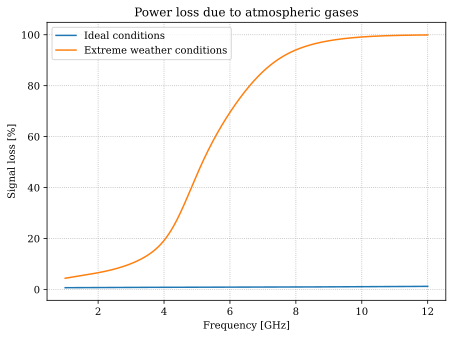

In [142]:
plt.title("Power loss due to atmospheric gases")
plt.plot(f, loss_dry * percent, label="Ideal conditions")
plt.plot(f, loss_wet * percent, label="Extreme weather conditions")
plt.xlabel('Frequency [GHz]')
plt.ylabel('Signal loss [%]')
plt.grid(which='both', linestyle=':')
plt.legend()
plt.show()